In [5]:
from keras.layers import Dense, InputLayer
from keras.models import Sequential, Model
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Intro
some quick demo of how a NN learns a representation which is able to learn a nonlinear class boundary with a linear classifer

In [3]:
from talk_utils import create_nonlin_data

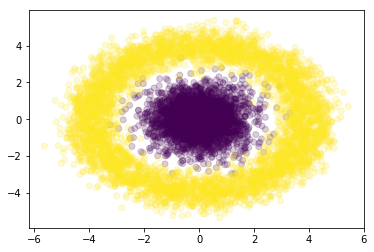

In [8]:
X, y = create_nonlin_data(5000)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.2)

In [9]:
from itertools import product

In [10]:
xgrid = np.array(list(product(np.linspace(-5,5,50),
                              np.linspace(-5,5,50)))
                 )
ygrid = model.predict(xgrid)

NameError: name 'model' is not defined

In [11]:
imshow(ygrid[:,1].reshape(50,50), cmap=cm.Reds)
plt.colorbar()

NameError: name 'ygrid' is not defined

In [12]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=model.predict(X)[:,1], cmap=cm.bwr)
plt.colorbar()

NameError: name 'model' is not defined

In [ ]:
Hmodel = Model(input=model.get_layer('input').input, 
               output=model.get_layer('hidden').output)

In [ ]:
h = Hmodel.predict(X)

In [ ]:
plt.scatter(h[:,0], h[:,1], c=y)


In [ ]:
plt.scatter(h[:,1], h[:,2], c=y)

In [ ]:

fig = plt.figure(1)
fig.clf()
ax = Axes3D(fig)

for i,c in zip([0,1], ['orange', 'blue']):
    ix = y==i
    ax.plot(h[ix, 0], 
            h[ix, 1], 
            h[ix, 2], 'o', c=c, alpha=0.5)# label=my_labels[index]

## step by step grad descend

In [43]:
import tensorflow as tf
sess = tf.Session()

from keras import backend as K
K.set_session(sess)

## model
img = tf.placeholder(tf.float32, shape=(None, 2))
H = Dense(3, activation='sigmoid', name='hidden')(img)
preds = Dense(2, activation='sigmoid', name='hidden')(H)

labels = tf.placeholder(tf.float32, shape=(None, 2))

from keras.objectives import categorical_crossentropy
loss = tf.reduce_mean(categorical_crossentropy(labels, preds))

In [44]:
train_step = tf.train.AdamOptimizer(0.1).minimize(loss)

# Initialize all variables
init_op = tf.global_variables_initializer()
sess.run(init_op)

# Run training loop
# h_vector = []

with sess.as_default():
    for i in range(1000):
        h_tmp = sess.run(H,feed_dict={img: X})
        h_vector.append(h_tmp)
        train_step.run(feed_dict={img: X,
                                  labels: to_categorical(y,2)})


In [47]:
for ii,h in enumerate(h_vector[-5:]):
    print(ii)
    fig = plt.figure()
#     fig.clf()
    ax = Axes3D(fig)
    
    for i,c in zip([0,1], ['orange', 'blue']):
        ix = y==i
        ax.plot(h[ix, 0], 
                h[ix, 1], 
                h[ix, 2], 'o', c=c, alpha=0.5)# label=my_labels[index]
        

0
1
2
3
4


In [77]:
fig = plt.figure()
ax = Axes3D(fig)

## animation

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [98]:
def update_lines(num, dataLines, lines, points):
    
    # dataliens is a 3D array with time,samples,dimensions
    
#     print(num)
    for i in range(len(lines)):
        # NOTE: there is no .set_data() for 3 dim data...
        
        line = lines[i]
#         print(dataLines.shape)
        rel = dataLines[(num-10):num,i]
#         print(rel.shape)

        line.set_data(rel[:,0], rel[:,1])
        line.set_3d_properties(rel[:,2])
        
        p = points[i]
        rel = dataLines[num,i]
        p.set_data(rel[0], rel[1])
        p.set_3d_properties(rel[2])
        
    return lines, points

# Attaching 3D axis to the figure
fig = plt.figure()
ax = Axes3D(fig)
# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('h1')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('h2')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('h3')


# lets 'augment the h_vector a little
# - making the initial/final state last alot longer
h_vector_aug = h_vector[:1]*10 + h_vector

# h_vector_aug = h_vector


data = np.stack(h_vector_aug)[:,::10,:]
dataY = y[::10]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
cols = ['blue' if dataY[_] == 0 else 'orange' for _ in range(data.shape[1])]
lines = [ax.plot(data[0:2,_,0], data[0:2,_,1], data[0:2,_,2], c=cols[_], alpha=0.5)[0] for _ in range(data.shape[1])]
points = [ax.plot(data[:1,_,0], data[:1,_,1], data[:1,_,2],'o', c=cols[_], alpha=0.5)[0] for _ in range(data.shape[1])]


In [96]:
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func=update_lines, frames=100, fargs=(data, lines, points),
                                   interval=200, blit=False)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
0
1
2
3
4
5
6
7
8
9
10
11


In [97]:
Writer = animation.ImageMagickFileWriter
writer = Writer(fps=15 ,)
line_ani.save('lines.gif', writer=writer)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


In [ ]:
plt.show()